In [1]:
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [36]:
class LinearRegression:

    def __init__(self, lr=0.054, n_iterations=1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    def  fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples)*np.dot(X.T, (y_predicted - y))
            db = (1/n_samples)*np.sum(y_predicted-y)

            self.weights -= self.lr*dw
            self.bias -= self.lr*db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [39]:
from sklearn.model_selection import train_test_split

X = np.random.rand(100, 1)
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

mse_value = mse(y_test, predicted)

print(mse_value)

0.013056953639823673


C:\Users\Asus\AppData\Local\Temp\ipykernel_15008\2679808461.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis")


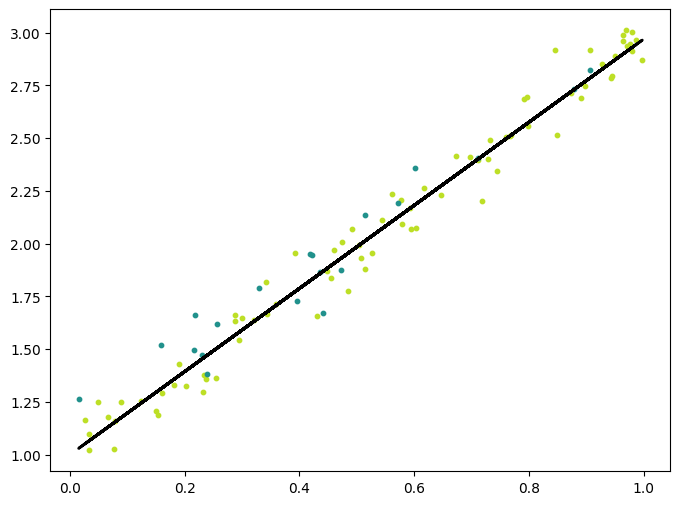

In [38]:
y_pred_line = regressor.predict(X)
cmap = plt.cm.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()